### Logistic Regression (로지스틱 회귀) 모델을 사용해보자!
- 예측 값이 0.5보다 작을 경우는0 , 0.5보다 클 경우는 1로 예측 (2진 분류)

### 와인 데이터를 이용한 이진분류
- 포르투칼의 비뉴 베르드 지방에서 만들어진 와인을 측정한 데이터
- 데이터셋 구성
  - 1599개의 레드와인, 4898개의 화이트와인 데이터 (총 6497개)
  - 12개의 특성과 1개의 클래스 (레이블)로 구성

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import tqdm
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings 
warnings.filterwarnings(action="ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression

In [5]:
wine = pd.read_csv('data/wine.csv', header=0)
wine

# 컬럼들은 대부분 화학성분들로 이루어져 있음
# quality (1~10단계, 1단계가 가장 낮은 등급)
# type (1: 레드와인, 0: 화이트 와인)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [7]:
# 문제
X = wine.iloc[:,:-1]
# 정답
y= wine.iloc[:,-1]

In [8]:
# 학습, 평가
X_train, X_test,y_train, y_test = train_test_split(X,y,
                                                   test_size =0.3,
                                                   random_state=5
                                                                   )

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4547, 12)
(1950, 12)
(4547,)
(1950,)


### 로지스틱회귀 모델 적용

In [11]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr_model = LogisticRegression(C=10, max_iter=100)
# C: alpha 값의 역수, 디폴트는 1, 낮을수록 규제가 강해진다. (과대적합이 해소된다.)
# max_iter: 경사하강법으로 학습하는 최대 횟수
# max_iter를 낮게 잡아주면 경고창이 뜨며 학습이 완전히 진행되지 않고 중간에 끊김
# max_iter를 높게 잡는다고 해서 성능이 달라지진 않음
# (경사하강법으로 w, b값이 최적값에 수렴하면 횟수를 늘려도 성능이 오르진 않음)

In [26]:
lr_model.fit(X_train,y_train)

LogisticRegression(C=10)

In [27]:
lr_model.score(X_train, y_train)

0.9826259071915548

In [28]:
lr_model.score(X_test, y_test)

0.9774358974358974

In [29]:
print('train-test 정확도 차이:', lr_model.score(X_train, y_train)-lr_model.score(X_test, y_test))

train-test 정확도 차이: 0.005190009755657421


### 최적의 C 값을 찾아보자

In [34]:
c_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# 정확도 값을 담아줄 빈 리스트들을 생성
train_acc =[]
test_acc =[]

for i in c_list:
    lr_model = LogisticRegression(C=i, max_iter=10000)
    lr_model.fit(X_train,y_train)
    
    lr_score_train=lr_model.score(X_train,y_train)
    lr_score_test=lr_model.score(X_test,y_test)
    
    train_acc.append(lr_score_train)
    test_acc.append(lr_score_test)

In [35]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname ="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

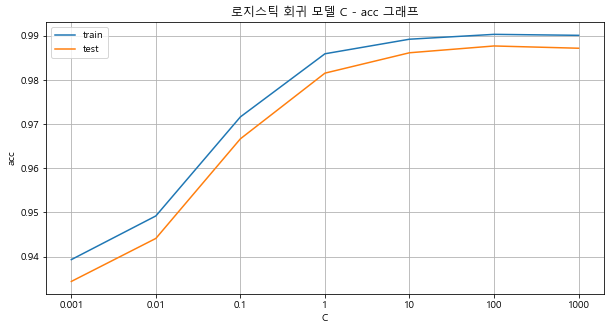

In [36]:
plt.figure(figsize=(10,5))
plt.plot(train_acc, label='train')   # train 그래프
plt.plot(test_acc, label='test')     # test 그래프
plt.title('로지스틱 회귀 모델 C - acc 그래프')  # 그래프 제목
plt.xlabel('C')
plt.xticks(np.arange(7), c_list)
plt.ylabel('acc')
plt.legend()
plt.grid()
plt.show()

### GridSearchCV를 이용해보자!

In [37]:
param_grid = {'C': [0.001,0.01, 0.1, 1,10, 100, 1000]}

In [38]:
grid_search = GridSearchCV(LogisticRegression(),
                           param_grid, 
                           cv=5)

In [39]:
grid_search

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [41]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [43]:
print("최적 매개변수:", grid_search.best_params_)
print("최고 교차 검증 점수:", grid_search.best_score_)

최적 매개변수: {'C': 1000}
최고 교차 검증 점수: 0.9813082846746213
